In [5]:
import random
import pandas
import numpy as np
import matplotlib.pyplot as plt
random.seed(10)
np.random.seed(10)

In [6]:
import pandas as pd
df = pd.read_table("C:\\Users\\hhz13\\Downloads\\UNOS data\\UNOS data\\Delimited Text File 202206\\Kidney_ Pancreas_ Kidney-Pancreas\\KIDPAN_DATA.DAT",header=None,engine='python')
#We use UNOS dataset，and use the kidpan dataset from it as our examples, df is the kidpan data. In the above code, we can import the data by filling the address of the data in the code.
#kidpan data(df) include 1097057 patient-donor pairs，the selected information of the pairs is represented by vectors the 27th component：patient's bloodtype，the 200th component:donor's bloodtype
#157th-162nd components:donor's a_1,a_2,b_1,b_2,dr_1,dr_2 antigens，163rd-168th components:patient's a_1,a_2,b_1,b_2,dr_1,dr_2 antigens

In [7]:
df #df is shown as follows

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
0,PA,.,NaN,0,.,.,NaN,.,.,NaN,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,14353,14353,24800
1,KI,.,NaN,0,0,0,C,.,.,N,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,03658,03658,18259
2,KI,.,NaN,0,0,0,C,.,.,N,...,NaN,NaN,NaN,Y,Y,18259,03658,03658,03658,18259
3,KI,.,NaN,1,3,3,C,.,.,N,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,03658,03658,18259
4,KI,.,NaN,1,5,8,C,.,.,N,...,NaN,NaN,NaN,Y,Y,18259,03658,03658,03658,18259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097053,KI,.,NaN,1,.,.,NaN,.,.,N,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,24986,24986,22196
1097054,KI,.,NaN,0,.,.,NaN,.,.,N,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,24614,24614,01395
1097055,KI,.,NaN,0,.,.,NaN,.,.,N,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,20243,20243,21080
1097056,KI,.,NaN,0,.,.,NaN,.,.,N,...,NaN,NaN,NaN,N,Y,Unknown,Unknown,24614,24614,01395


In [8]:
from tqdm import tqdm
x_1=['N' for i in range(1097058)]
x_2=['N' for i in range(1097058)]
data_list=[]
for i in tqdm(range(1097058)):#We collect the patient-donor pairs that have complete information of blood types and antigens
    sample=df.loc[i].values
    if sample[156]==".":
        continue
    x_1[i]=sample[26]
    if x_1[i]=="A1" or x_1[i]=="A2" or x_1[i]=="A":
        x_1[i]="A"
    if x_1[i]=="B1" or x_1[i]=="B2" or x_1[i]=="B":
        x_1[i]="B"
    x_2[i]=sample[199]
    if x_2[i]=="A1" or x_2[i]=="A2" or x_2[i]=="A":
        x_2[i]="A"
    if x_2[i]=="B1" or x_2[i]=="B2" or x_2[i]=="B":
        x_2[i]="B"
    if x_1[i]!="A" and x_1[i]!="B" and x_1[i]!="O" and x_1[i]!="AB":
        continue
    if x_2[i]!="A" and x_2[i]!="B" and x_2[i]!="O" and x_2[i]!="AB":
        continue
    antigen=sample[156:168].tolist()
    data_list.append( (x_1[i],x_2[i],antigen))#We only collect their information about patient and donor's bloodtypes and their antigens
        


100%|██████████████████████████████████████████████████████████████████████| 1097058/1097058 [05:08<00:00, 3553.46it/s]


In [9]:
#The above code collects information from the pairs who have complete information about their bloodtypes and antigens.
#Each pair's information is collected in a component of the list，including the following information：the 0th part is the patient's bloodtype，the 1st part is the donor's bloodtype，the 2nd part is an array about the antigens，
#the first 6 components of the array are the antigens of the donor, the last 6 components of the array are the antigens of the patient

In [10]:
real_hard_to_match_agent=[]
real_easy_to_match_agent=[]#lists used to collect hard_to_match agents and easy_to_match agents

In [11]:
i=0
while i<len(data_list):#Here we only consider the pairs whose patient and donor have compatible bloodtypes but need to exchange due to the incompatible antigens
    if (data_list[i][0]==data_list[i][1] and (data_list[i][0]=="A" or data_list[i][0]=="B") ):#A-A, B-B types
        #print(i)
        real_hard_to_match_agent.append(data_list[i])
        i+=1
        continue
    if (data_list[i][0]!="O" and data_list[i][1]=="O") :#X-O type:donor's blood type is O
        #print(i)
        real_easy_to_match_agent.append(data_list[i])
        i+=1
        continue
    if data_list[i][0]=="AB" and (data_list[i][1]=="A" or data_list[i][1]=="B" or data_list[i][1]=="O" ):#AB-X type:patient's blood type is AB
        real_easy_to_match_agent.append(data_list[i])
        i+=1
        continue
    else:
        del data_list[i]
    

In [12]:
import random
random.seed(10)
import matplotlib.pyplot as plt
import pip
import numpy as np
import math
from scipy.stats import pareto
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from IPython.display import display, Math

In [13]:
def match_patient_donor_blood(x,y):#To determine if donor y can donate to patient x when only considering bloodtypes
    if y=="O":
        return 1
    if x=="AB":
        return 1
    if y==x:
        return 1
    return 0
    




def ifmatch(sample_1,sample_2):#To determine if two pairs are matched
    threshold=6 #6 antigens are required to be all matched
    if match_patient_donor_blood(sample_1[0],sample_2[1]) and match_patient_donor_blood(sample_2[0],sample_1[1]):#First check the bloodtype
        count=0
        for k in range(len(sample_1[2])):
            if sample_1[2][k]==sample_2[2][k]:
                count+=1
        if count>=threshold:#To check if all 6 antigens are matched
            return 1
        else:
            return 0
    
    else:
        return 0
    
    
    
            

In [14]:
def real_data_simulation_patient_algorithm_loss(m,lam):#in this simulation, we use the agents from the dataset and let them come/leave the market according to our given Poisson distribution
    hard_to_match_agent=real_hard_to_match_agent.copy()
    easy_to_match_agent=real_easy_to_match_agent.copy()#We make a copy of the original dataset and use the copied dataset
   
    
    easy_hascome=0
    hard_hascome=0 #The total number of easy-to-match/hard-to-match agents that once came to the pool
    easy_hasgone=0
    hard_hasgone=0 #The number of easy-to-match/hard-to-match agents that once came to the pool but left without matching 
    easy_pool=[]
    hard_pool=[]#easy_pool, hard_pool are used to store the agents that stay in the pool currently
    for t in range(50000):#Use 50000 transitions
        choice=random.random()
        if choice<=1.0*m/(m+len(easy_pool)+len(hard_pool)):#The circumstance that nobody becomes critical and someone new comes
            easy_or_hard=np.random.choice(2,p=[lam,1-lam])#To determine whether the new agent is hard-to-match agent or easy-to-match agent
            if easy_or_hard==0:#new agent is easy-to-match agents
                easy_hascome+=1
                easy_pool.append(easy_to_match_agent[0])#Move an easy-to-match agent from the dataset to the pool
                del easy_to_match_agent[0]#Delete the moved easy-to-match agent from the dataset
                
                
               
            if easy_or_hard==1:#new agent is hard-to-match agents
                hard_hascome+=1
                hard_pool.append(hard_to_match_agent[0])#Move an hard-to-match agent from the dataset to the pool
                del hard_to_match_agent[0]#Delete the moved hard-to-match agent from the dataset
                
              
                
           
                
        else:#The circumstance that one agent in the pool becomes critical before someone new comes
            choice=np.random.choice(2,p=[len(easy_pool)/(len(easy_pool)+len(hard_pool)),len(hard_pool)/(len(easy_pool)+len(hard_pool))])#To determine the critical agent is easy-to-match agent or hard-to-match agent
            if choice==0:#The critical agent is easy-to-match agent
                choice_number=random.randint(0,len(easy_pool)-1)#choose the critical agent randomly
                critical_easy_agent=easy_pool[choice_number]#Select the critical agent
                del easy_pool[choice_number]#Move away the critical agent from the pool
                candidate_hard=[]
                candidate_easy=[]#candidate_hard/candidate_easy are used to store the agents that are completely compatible with the critical agent
                for r in range(len(easy_pool)):
                    if ifmatch(critical_easy_agent,easy_pool[r]):
                        candidate_easy.append(r)
                for r in range(len(hard_pool)):
                    if ifmatch(critical_easy_agent,hard_pool[r]):
                        candidate_hard.append(r)
                flag=False #flag is a boolean used to record whether the critical agent finds someone to match with
                if candidate_hard!=[]:#There exists some hard-to-match agent compatible with the critical agent, so the critical agent will match with the hard-to-match agent
                    match_number=random.randint(0,len(candidate_hard)-1)
                    del hard_pool[candidate_hard[match_number]]#Choose which hard-to-match agent to match with the critical agent
                    flag=True
                else:
                    if candidate_easy!=[]:#There exists no hard-to-match agent but some easy-to-match agent compatible with the critical agent, so the critical agent will match with the hard-to-match agent
                        match_number=random.randint(0,len(candidate_easy)-1)
                        del easy_pool[candidate_easy[match_number]]#Choose which easy-to-match agent to match with the critical agent
                        flag=True
                if not flag:
                    easy_hasgone+=1#The critical agent leaves without matching
            if choice==1:#One hard-to-match agent becomes critical
                choice_number=random.randint(0,len(hard_pool)-1)#choose the critical agent randomly
                critical_hard_agent=hard_pool[choice_number]#select the critical agent
                del hard_pool[choice_number]#Move away the critical agent from the pool
                candidate_hard=[]
                candidate_easy=[]#candidate_hard/candidate_easy are used to store the agents that are completely compatible with the critical agent
                for r in range(len(easy_pool)):
                    if ifmatch(critical_hard_agent,easy_pool[r]):
                        candidate_easy.append(r)
                for r in range(len(hard_pool)):
                    if ifmatch(critical_hard_agent,hard_pool[r]):
                        candidate_hard.append(r)
                flag=False #flag is a boolean used to record whether the critical agent finds someone to match with
                if candidate_hard!=[]:#There exists some hard-to-match agent compatible with the critical agent, so the critical agent will match with the hard-to-match agent
                    match_number=random.randint(0,len(candidate_hard)-1)
                    del hard_pool[candidate_hard[match_number]]#Choose which hard-to-match agent to match with the critical agent
                    flag=True
                else:
                    if candidate_easy!=[]:#There exists no hard-to-match agent but some easy-to-match agent compatible with the critical agent, so the critical agent will match with the easy-to-match agent
                        match_number=random.randint(0,len(candidate_easy)-1)
                        del easy_pool[candidate_easy[match_number]]#Choose which easy-to-match agent to match with the critical agent
                        flag=True
                if not flag:
                    hard_hasgone+=1#The critical agent leaves without matching
                
                        
               
            
 
  

    return 1.0*easy_hasgone/easy_hascome,1.0*hard_hasgone/hard_hascome

In [15]:
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
easy_loss_patient=np.zeros(41)
hard_loss_patient=np.zeros(41)
numbda=[0.02*i for i in range(4,45)]
for k in tqdm(range(1,42)):
    lam=numbda[k-1]
    easy_tem,hard_tem=real_data_simulation_patient_algorithm_loss(2000,lam)
    easy_loss_patient[k-1]+=easy_tem
    hard_loss_patient[k-1]+=hard_tem
#     easy_loss_greedy[k-1]*=1
#     hard_loss_greedy[k-1]*=1
# fig,ax=plt.subplots(1,1)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax.set_xlabel("$\lambda$",fontsize=15)
# ax.set_ylabel("Loss",fontsize=15)
# ax.plot(numbda,easy_loss,'y-',lw=2,label='easy-to-match-agent')
# ax.plot(numbda,hard_loss,'r--',lw=2,label='hard-to-match-agent')
# ax.set_title("Patient Algorithm",fontsize=20)
# ax.legend(loc='best', frameon=False,fontsize=17)


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.21s/it]


In [16]:
def real_data_simulation_greedy_algorithm_loss(m,lam):#in this simulation, we use the agents from the dataset and let them come/leave the market according to our given Poisson distribution
    hard_to_match_agent=real_hard_to_match_agent.copy()
    easy_to_match_agent=real_easy_to_match_agent.copy()#We make a copy of the original dataset and use the copied dataset
   
   
    easy_hascome=0
    hard_hascome=0 #The total number of easy-to-match/hard-to-match agents that once came to the pool
    easy_hasgone=0
    hard_hasgone=0 #The number of easy-to-match/hard-to-match agents that once came to the pool but left without matching 
    easy_pool=[]
    hard_pool=[] #easy_pool, hard_pool are used to store the agents that stay in the pool currently
    for t in range(50000):#Use 50000 transitions
        choice=random.random()
        if choice<=1.0*m/(m+len(easy_pool)+len(hard_pool)):#The circumstance that someone new comes before someone becomes critical
            easy_or_hard=np.random.choice(2,p=[lam,1-lam])#To determine the new agent is easy-to-match agent or hard-to-match agent
            if easy_or_hard==0:#new agent is easy-to-match agents
                easy_hascome+=1
                come_agent=easy_to_match_agent[0]
                del easy_to_match_agent[0]#Delete the new agent from the dataset
                candidate_hard=[]
                candidate_easy=[]#To store the agents that are completely compatible with the new agent
                for r in range(len(easy_pool)):
                    if ifmatch(come_agent,easy_pool[r]):
                        candidate_easy.append(r)
                for r in range(len(hard_pool)):
                    if ifmatch(come_agent,hard_pool[r]):
                        candidate_hard.append(r)
                flag=False #To record whether the new agent finds someone to match with
                if candidate_hard!=[]:
                    match_number=random.randint(0,len(candidate_hard)-1)
                    del hard_pool[candidate_hard[match_number]]
                    flag=True #match with a hard-to-match agent
                else:
                    if candidate_easy!=[]:
                        match_number=random.randint(0,len(candidate_easy)-1)
                        del easy_pool[candidate_easy[match_number]]
                        flag=True #match with a easy-to-match agent
                if not flag: 
                    easy_pool.append(come_agent) #match with nobody and stays in the pool
            if easy_or_hard==1:#new agent is hard-to-match agent
                hard_hascome+=1
                come_agent=hard_to_match_agent[0]
                del hard_to_match_agent[0]#Delete the new agent from the dataset
                candidate_hard=[]
                candidate_easy=[]#To store the agents that are completely compatible with the new agent
                for r in range(len(easy_pool)):
                    if ifmatch(come_agent,easy_pool[r]):
                        candidate_easy.append(r)
                for r in range(len(hard_pool)):
                    if ifmatch(come_agent,hard_pool[r]):
                        candidate_hard.append(r)
                flag=False #To record whether the new agent finds someone to match with
                if candidate_hard!=[]:
                    match_number=random.randint(0,len(candidate_hard)-1)
                    del hard_pool[candidate_hard[match_number]]
                    flag=True #match with a hard-to-match agent
                else:
                    if candidate_easy!=[]:
                        match_number=random.randint(0,len(candidate_easy)-1)
                        del easy_pool[candidate_easy[match_number]]
                        flag=True #match with a easy-to-match agent
                if not flag:
                    hard_pool.append(come_agent)#match with nobody and stays in the pool
                
               
            
               
              
                
           
                
        else:#The circumstance that someone becomes critical before someone new comes
            choice=np.random.choice(2,p=[len(easy_pool)/(len(easy_pool)+len(hard_pool)),len(hard_pool)/(len(easy_pool)+len(hard_pool))])
            if choice==0:#easy-to-match agent becomes critical and leaves the pool
                choice_number=random.randint(0,len(easy_pool)-1)
                critical_easy_agent=easy_pool[choice_number]
                del easy_pool[choice_number]
                easy_hasgone+=1
            if choice==1:#hard-to-match agent becomes critical and leaves the pool
                choice_number=random.randint(0,len(hard_pool)-1)
                critical_hard_agent=hard_pool[choice_number]
                del hard_pool[choice_number]
                hard_hasgone+=1
                
                        
               
            
 
  

    return 1.0*easy_hasgone/easy_hascome,1.0*hard_hasgone/hard_hascome

In [17]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
easy_loss_greedy=np.zeros(41)
hard_loss_greedy=np.zeros(41)
numbda=[0.02*i for i in range(4,45)]
for k in tqdm(range(1,42)):
    lam=numbda[k-1]
    easy_tem,hard_tem=real_data_simulation_greedy_algorithm_loss(2000,lam)
    easy_loss_greedy[k-1]+=easy_tem
    hard_loss_greedy[k-1]+=hard_tem
#     easy_loss_greedy[k-1]*=1
#     hard_loss_greedy[k-1]*=1
# fig,ax=plt.subplots(1,1)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax.set_xlabel("The Proportion of Easy-to-Match Agents Among All Agents($\lambda$)")
# ax.set_ylabel("Loss for Easy-to-Match Agents and Hard-to-Match Agents")
# ax.plot(numbda,easy_loss,'y',lw=2,label='loss for easy-to-match-agent')
# ax.plot(numbda,hard_loss,'r',lw=2,label='loss for hard-to-match-agent')
# ax.set_title("Empirical Study for the Loss of Greedy Algorithm when $m=%d$"%(2000))
# ax.legend(loc='best', frameon=False)
# plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [19:26<00:00, 28.46s/it]


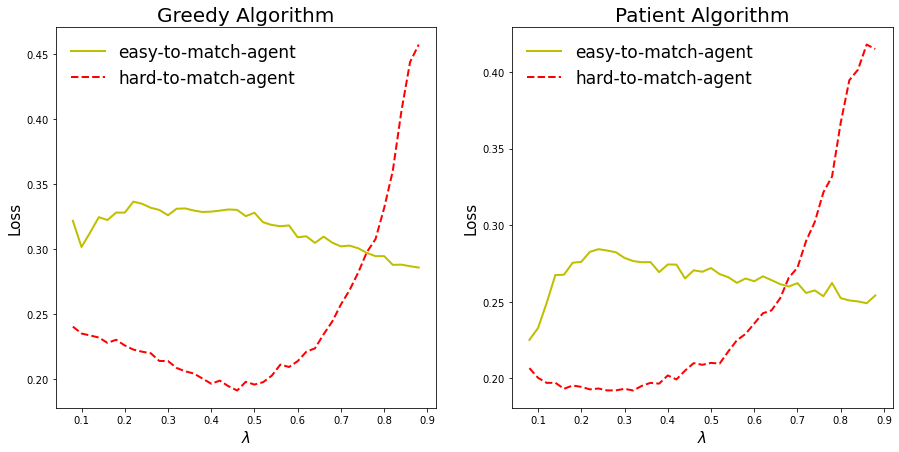

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[0].set_xlabel("$\lambda$",fontsize=15)
ax[0].set_ylabel("Loss",fontsize=15)
ax[0].plot(numbda,easy_loss_greedy,'y-',lw=2,label='easy-to-match-agent')
ax[0].plot(numbda,hard_loss_greedy,'r--',lw=2,label='hard-to-match-agent')
ax[0].set_title("Greedy Algorithm",fontsize=20)
ax[0].legend(loc='best', frameon=False,fontsize=17)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[1].set_xlabel("$\lambda$",fontsize=15)
ax[1].set_ylabel("Loss",fontsize=15)
ax[1].plot(numbda,easy_loss_patient,'y-',lw=2,label='easy-to-match-agent')
ax[1].plot(numbda,hard_loss_patient,'r--',lw=2,label='hard-to-match-agent')
ax[1].set_title("Patient Algorithm",fontsize=20)
ax[1].legend(loc='best', frameon=False,fontsize=17)
plt.savefig('C:\\Users\\hhz13\\Downloads\\Figure_5_Empirical_Study.eps', format='eps', dpi=1000)